## COMP 6934 Winter 2025 In class Work 5

Using Pandas merge and date/time types.

The dataset is the same as problem set 2 through 4, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

Use the improved data set weather.zip

First, I grab the data from a csv format file into a pandas dataframe:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

# read the csv data into a dataframe
df = pd.read_csv('datasets/jash312i/NL_weather.csv')

/tmp/ipykernel_87849/4206192301.py:4: DtypeWarning: Columns (3,20,22,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/jash312i/NL_weather.csv')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99657 entries, 0 to 99656
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              99657 non-null  float64
 1   Latitude (y)               99657 non-null  float64
 2   Station Name               99657 non-null  object 
 3   Climate ID                 99657 non-null  object 
 4   Date/Time                  99657 non-null  object 
 5   Year                       99657 non-null  int64  
 6   Month                      99657 non-null  int64  
 7   Day                        99657 non-null  int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (C)               89860 non-null  float64
 10  Max Temp Flag              6292 non-null   object 
 11  Min Temp (C)               89834 non-null  float64
 12  Min Temp Flag              6307 non-null   object 
 13  Mean Temp (C)              89733 non-null  flo

## Problem Set 5

We're doing merging two data sets using time codes.

Don't forget to deal with bad data values, but only from the columns we are plotting. Don't drop records with bad data if the columns we are using are good data.

## Problem 5

Plot the difference in mean daily temperature between St. John's Airport and Toronto City weather station for August of the year 2020
* Read one data frame from the NL data file and a second from the ON data file.
* In one dataframe, reduce the data to St. John's airport weather station, and reduce to Toronto City in the other dataframe.
* Convert the date/time data to Pandas datatype (Timestamp) in both datasets.
* Merge the datasets on the date/time entry
    * Make sure the timestamps are only accurate to the day, not time of day, or the records will not merge because times will not match
    * We are interested in mean daily temperature, but the other data columns may be left out of the merge (but include station name and date/time)
      
* Add a column for the difference in temperature at the two stations.
* Reduce the data to August of 2020.  For practice, use the date/time Timestamp operations, do not use the month and day columns that were provided for your convenience. Most data sets will only have one timestamp data entry.
* Plot the difference and provide appropriat plot labels.

In [3]:
# NL data load.
df_NL = pd.read_csv('Data/NL_weather.csv',low_memory=False)
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99657 entries, 0 to 99656
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              99657 non-null  float64
 1   Latitude (y)               99657 non-null  float64
 2   Station Name               99657 non-null  object 
 3   Climate ID                 99657 non-null  object 
 4   Date/Time                  99657 non-null  object 
 5   Year                       99657 non-null  int64  
 6   Month                      99657 non-null  int64  
 7   Day                        99657 non-null  int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (C)               89860 non-null  float64
 10  Max Temp Flag              6292 non-null   object 
 11  Min Temp (C)               89834 non-null  float64
 12  Min Temp Flag              6307 non-null   object 
 13  Mean Temp (C)              89733 non-null  flo

In [4]:
df_st = df_NL[df_NL['Station Name'].str.contains("ST. JOHN'S INTL") & (df_NL['Year'] == 2020)
                    & (df_NL['Month'] == 8)].reset_index() # reset index will force a new df and not a slice.
df_st.head()

,index,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,53149,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-08-01,2020,8,1,NaN,...,0.0,NaN,0.2,NaN,NaN,NaN,NaN,M,NaN,M
1,53150,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-08-02,2020,8,2,NaN,...,0.0,NaN,2.0,NaN,NaN,NaN,35.0,NaN,41.0,NaN
2,53151,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-08-03,2020,8,3,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,26.0,NaN,58.0,NaN
3,53152,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-08-04,2020,8,4,NaN,...,0.0,NaN,5.8,NaN,NaN,NaN,26.0,NaN,59.0,NaN
4,53153,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-08-05,2020,8,5,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,26.0,NaN,48.0,NaN


In [5]:
# set date time in only day
df_st['Date/Time'] = pd.to_datetime(df_st['Date/Time']).dt.date

In [6]:
# Taking the Mean temperature.
stj = df_st.groupby('Date/Time')['Mean Temp (C)'].mean().reset_index()

In [7]:
# Ontaio Data Set.
df_ON = pd.read_csv('Data/ON_weather.csv',low_memory=False)
df_ON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374429 entries, 0 to 374428
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Longitude (x)              374429 non-null  float64
 1   Latitude (y)               374429 non-null  float64
 2   Station Name               374429 non-null  object 
 3   Climate ID                 374429 non-null  object 
 4   Date/Time                  374429 non-null  object 
 5   Year                       374429 non-null  int64  
 6   Month                      374429 non-null  int64  
 7   Day                        374429 non-null  int64  
 8   Data Quality               0 non-null       float64
 9   Max Temp (C)               340781 non-null  float64
 10  Max Temp Flag              12089 non-null   object 
 11  Min Temp (C)               339806 non-null  float64
 12  Min Temp Flag              12184 non-null   object 
 13  Mean Temp (C)              33

In [8]:
df_ON['Station Name'].unique()

array(['ATTAWAPISKAT A', 'BIG TROUT LAKE A', 'BIG TROUT LAKE',
       'EAR FALLS (AUT)', 'FORT SEVERN A', 'LANSDOWNE HOUSE A',
       'LANSDOWNE HOUSE (AUT)', 'MUSKRAT DAM', 'PEAWANUCK (AUT)',
       'PEAWANUCK A', 'PICKLE LAKE (AUT)', 'PICKLE LAKE A', 'RED LAKE A',
       'SANDY LAKE A', 'BARWICK', 'ATIKOKAN (AUT)', 'FORT FRANCES RCS',
       'MINE CENTRE SOUTHWEST', 'DRYDEN REGIONAL', 'KENORA RCS',
       'KENORA A', 'RAWSON LAKE', 'RAWSON LAKE (AUT)',
       'ROYAL ISLAND (AUT)', 'SIOUX LOOKOUT A', 'SIOUX LOOKOUT AIRPORT',
       'ARMSTRONG (AUT)', 'ARMSTRONG A', 'CAMERON FALLS (AUT)',
       'CARIBOU ISLAND (AUT)', 'GERALDTON A', 'GERALDTON AIRPORT',
       'HAZELWOOD', 'MARATHON A', 'PUKASKWA (AUT)', 'TERRACE BAY AIRPORT',
       'THUNDER BAY', 'THUNDER BAY A', 'THUNDER BAY BURWOOD',
       'THUNDER BAY CS', 'UPSALA (AUT)', 'WELCOME ISLAND (AUT)',
       'LITTLE FLATLAND ISLAND (AUT)', 'LAKE SUPERIOR PROVINCIAL PARK',
       'SAULT STE MARIE A', 'SAULT STE. MARIE AIRPORT', 'WAWA A

In [9]:
df_tn = df_ON[df_ON['Station Name'].str.contains("TORONTO CITY") & (df_ON['Year'] == 2020)
                    & (df_ON['Month'] == 8)].reset_index() # reset index will force a new df and not a slice.

In [10]:
df_tn['Date/Time'] = pd.to_datetime(df_tn['Date/Time']).dt.date
df_tn['Date/Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 62 entries, 0 to 61
Series name: Date/Time
Non-Null Count  Dtype 
--------------  ----- 
62 non-null     object
dtypes: object(1)
memory usage: 624.0+ bytes


In [11]:
toronto = df_tn.groupby('Date/Time')['Mean Temp (C)'].mean().reset_index()

In [12]:
## Merge the data.
# df_st.merge(df_tn, on=('Date/Time'))
merge_data = stj.merge(toronto, on='Date/Time', suffixes=('_st_johns', '_toronto'))

In [13]:
merge_data

,Date/Time,Mean Temp (C)_st_johns,Mean Temp (C)_toronto
0,2020-08-01,17.6,23.40
1,2020-08-02,15.3,23.00
2,2020-08-03,21.3,21.40
3,2020-08-04,18.0,20.85
4,2020-08-05,15.7,19.65
5,2020-08-06,20.1,18.70
6,2020-08-07,19.6,20.40
7,2020-08-08,19.3,21.80
8,2020-08-09,19.5,23.30
9,2020-08-10,21.5,23.70


In [14]:
# Make difference column on merge data.
merge_data['Temp Difference (C)'] = merge_data['Mean Temp (C)_toronto'] - merge_data['Mean Temp (C)_st_johns']
merge_data.head()

,Date/Time,Mean Temp (C)_st_johns,Mean Temp (C)_toronto,Temp Difference (C)
0,2020-08-01,17.6,23.40,5.80
1,2020-08-02,15.3,23.00,7.70
2,2020-08-03,21.3,21.40,0.10
3,2020-08-04,18.0,20.85,2.85
4,2020-08-05,15.7,19.65,3.95


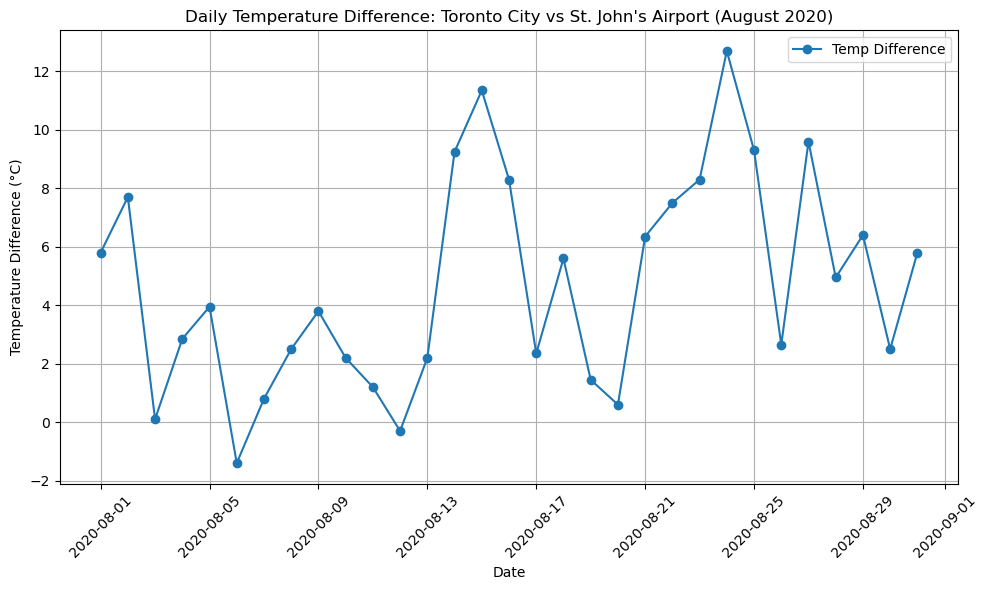

In [15]:
# Step 7: Plot the temperature difference
plt.figure(figsize=(10, 6))
plt.plot(merge_data['Date/Time'], merge_data['Temp Difference (C)'], marker='o', linestyle='-', label='Temp Difference')
plt.title('Daily Temperature Difference: Toronto City vs St. John\'s Airport (August 2020)')
plt.xlabel('Date')
plt.ylabel('Temperature Difference (°C)')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |